In [238]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import display
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

## 1) Problem Statement

- Predict behavior to retain customers

## 2) Data Gathering

In [157]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3) EDA

- Insights

- Shape of the data :
    - rows >    7043
    - columns > 21
    
- Finding missing values:
    - TotalCharges >> 11 Missing value presen
    
- Count of categorical column is 18
- Categorical columns are > ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

- Count of numericla columns is 3
- Numerical columns are > ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']

- Outliers 
- Outliers Status >> No Outliers

- unique value & value counts of categorical column
- gender
- Male      3555
- Female    3488
- Name: count, dtype: int64
- **************************************************
- Partner
- No     3641
- Yes    3402
- Name: count, dtype: int64
- **************************************************
- Dependents
- No     4933
- Yes    2110
- Name: count, dtype: int64
- **************************************************
- PhoneService
- Yes    6361
- No      682
- Name: count, dtype: int64
- **************************************************
- MultipleLines
- No                  3390
- Yes                 2971
- No phone service     682
- Name: count, dtype: int64
- **************************************************
- InternetService
- Fiber optic    3096
- DSL            2421
- No             1526
- Name: count, dtype: int64
- **************************************************
- OnlineSecurity
- No                     3498
- Yes                    2019
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- OnlineBackup
- No                     3088
- Yes                    2429
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- DeviceProtection
- No                     3095
- Yes                    2422
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- TechSupport
- No                     3473
- Yes                    2044
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- StreamingTV
- No                     2810
- Yes                    2707
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- StreamingMovies
- No                     2785
- Yes                    2732
- No internet service    1526
- Name: count, dtype: int64
- **************************************************
- Contract
- Month-to-month    3875
- Two year          1695
- One year          1473
- Name: count, dtype: int64
- **************************************************
- PaperlessBilling
- Yes    4171
- No     2872
- Name: count, dtype: int64
- **************************************************
- PaymentMethod
- Electronic check             2365
- Mailed check                 1612
- Bank transfer (automatic)    1544
- Credit card (automatic)      1522
- Name: count, dtype: int64
- **************************************************
- TotalCharges
-           11
- 20.2      11
- 19.75      9
- 20.05      8
- 19.9       8
          ..
- 6849.4     1
- 692.35     1
- 130.15     1
- 3211.9     1
- 6844.5     1
- Name: count, Length: 6531, dtype: int64
- **************************************************
- Churn
- No     5174
- Yes    1869
- Name: count, dtype: int64

- ################################################### Shpe of the Data ####################################################

- rows >    7043
- columns > 21

In [9]:
df.shape

(7043, 21)

#### 3.1 Finding missing  values

- ################################################# finding missing value #################################################

- No missing value present in data

In [10]:
df.isnull().mean()*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- ############################################ Information ################################################################

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- ################################ Categorical column #####################################################################

- Count of categorical column is 18
- Categorical columns are > ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges','Churn']

In [12]:
cat_feature = [i for i in df.columns if df.dtypes[i] == "object"]
df[cat_feature].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [13]:
df[cat_feature].shape

(7043, 18)

In [14]:
df[cat_feature].columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

- ############################################# Numerical columns #########################################################

- Count of numericla columns is 3
- Numerical columns are > ['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [15]:
df._get_numeric_data()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [16]:
df._get_numeric_data().shape

(7043, 3)

In [17]:
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

- ############################################ Outliers ###################################################################

- Outliers Status >> No Outliers

In [18]:
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

<AxesSubplot:>

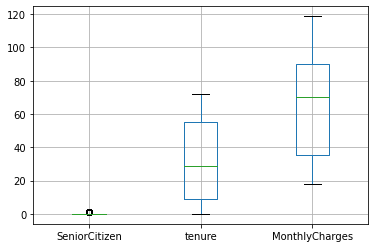

In [22]:
df.boxplot()

<AxesSubplot:xlabel='tenure'>

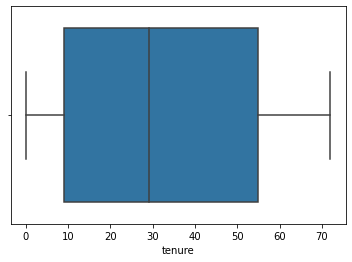

In [23]:
sns.boxplot(x = df["tenure"])

<AxesSubplot:xlabel='MonthlyCharges'>

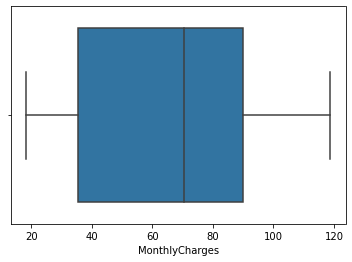

In [24]:
sns.boxplot(x = df["MonthlyCharges"])

- ############################################# Correlation checking #######################################################

In [25]:
df1 = df._get_numeric_data()

In [26]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

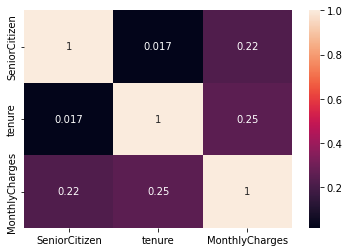

In [27]:
sns.heatmap(df1.corr(),annot=True)

- ############################### unique value & value counts of categorical column ########################################

In [28]:
df.select_dtypes(include="object").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [29]:
lst = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn']
for i in lst:
#     print(i)
    print(df[i].value_counts())
    print("*"*50)

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
**************************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**************************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
**************************************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
**************************************************
OnlineBackup
No                     3088
Yes            

- ####################################### unique of numerical column ######################################################

In [30]:
df._get_numeric_data().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [31]:
lst = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
for i in lst:
    print(f"{i}")
    print(df[i].unique())
    print("*"*50)

SeniorCitizen
[0 1]
**************************************************
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
**************************************************


- ####################################################      ##############################################################

- On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that

- TotalCharges >> 11 Missing value present

In [32]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Graphical Representation

- Gender vs Churn 

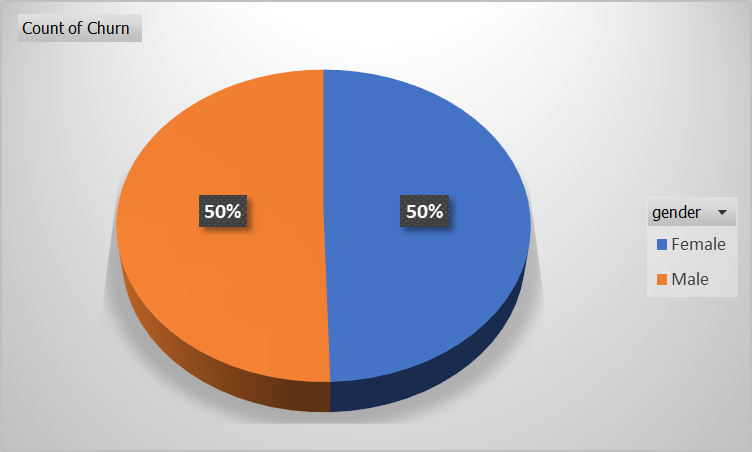

- Gender vs Dependency[yes]

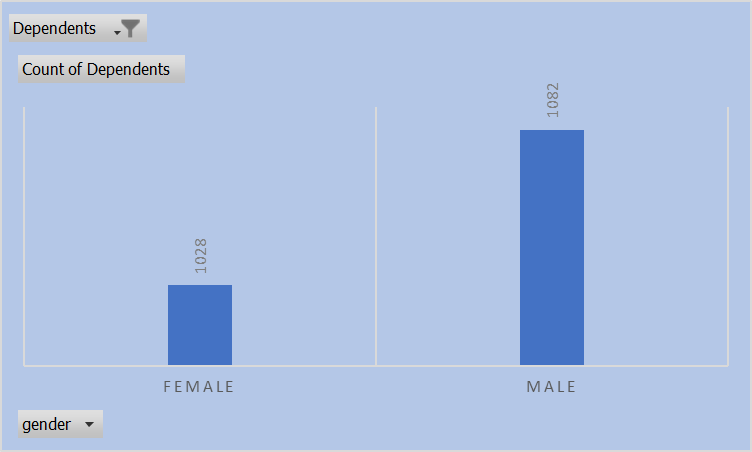

- Gender vs Dependency[NO]

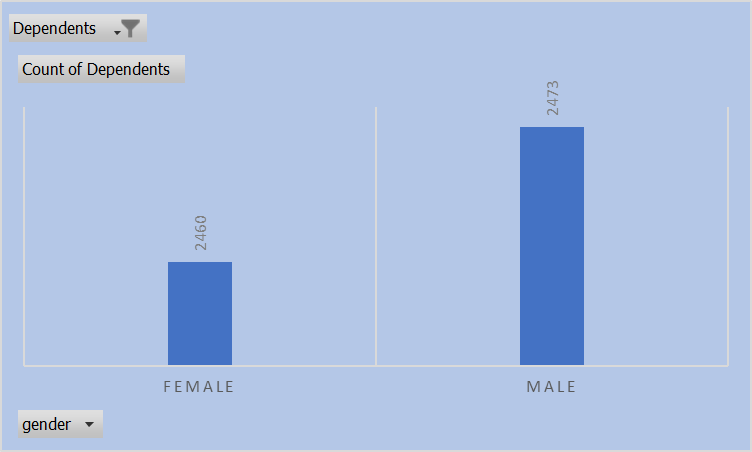

- Gender vs Seniorcitizev [0]

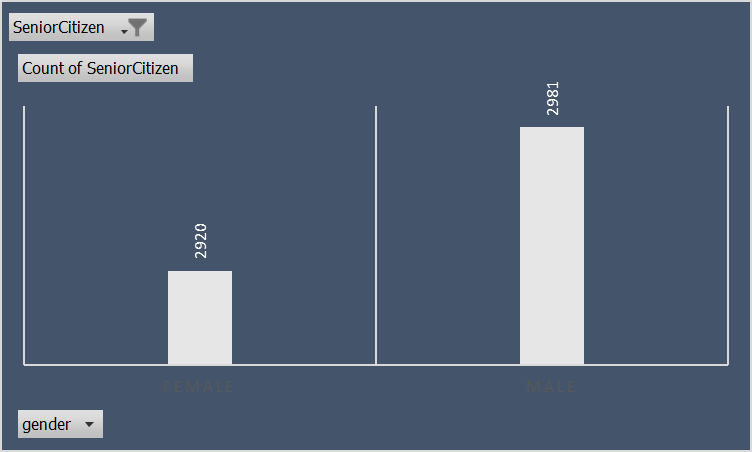

- Gender vs Seniorcitizev [1]

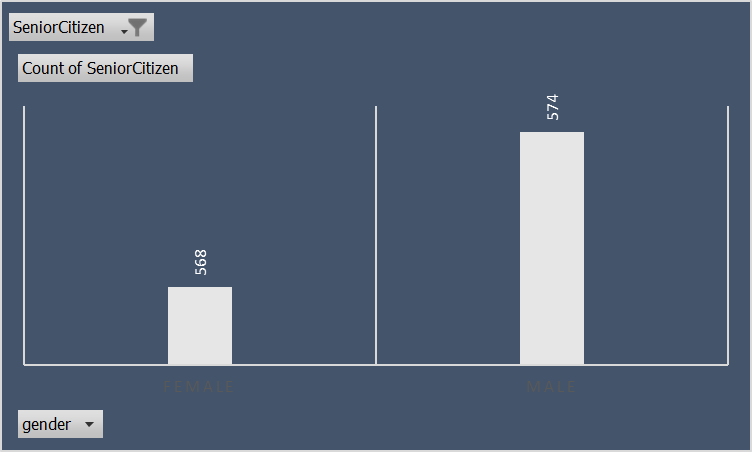

- Gender vs Patner[Yes]

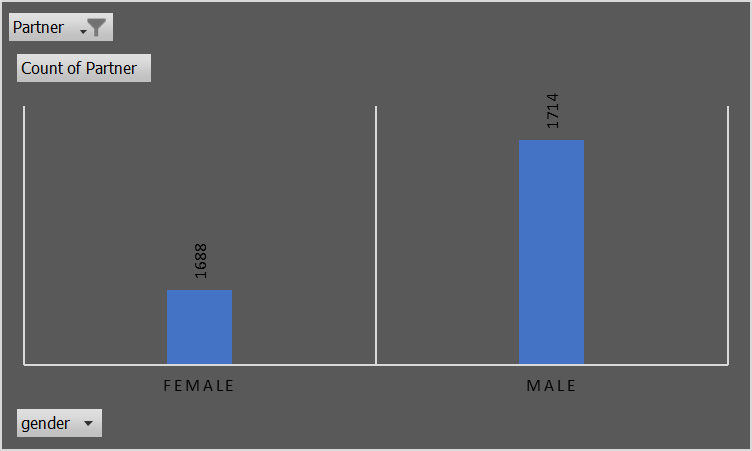

- Gender vs Patner[No]

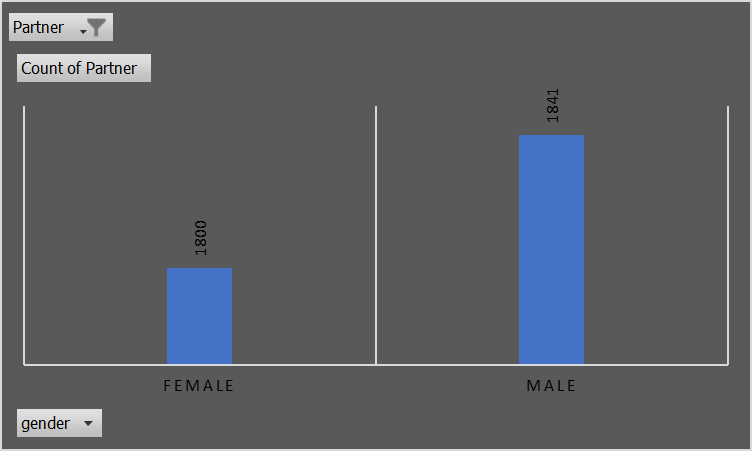

- Premium vs Churn[Yes]

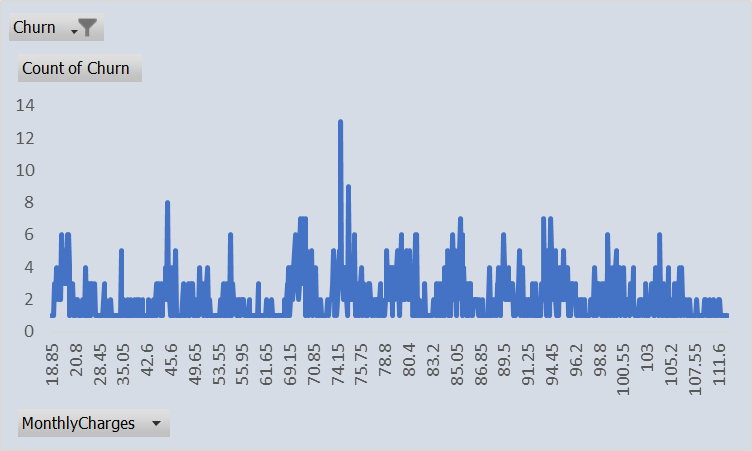

- Premium vs Churn[No]

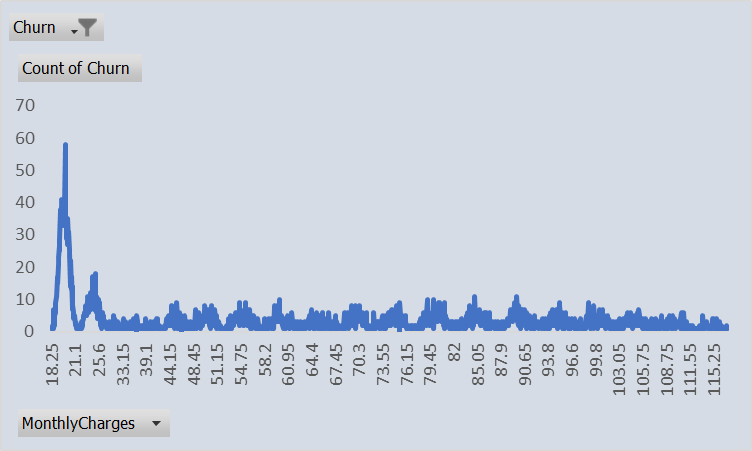

- Churn vs SeniorCitizen[0]

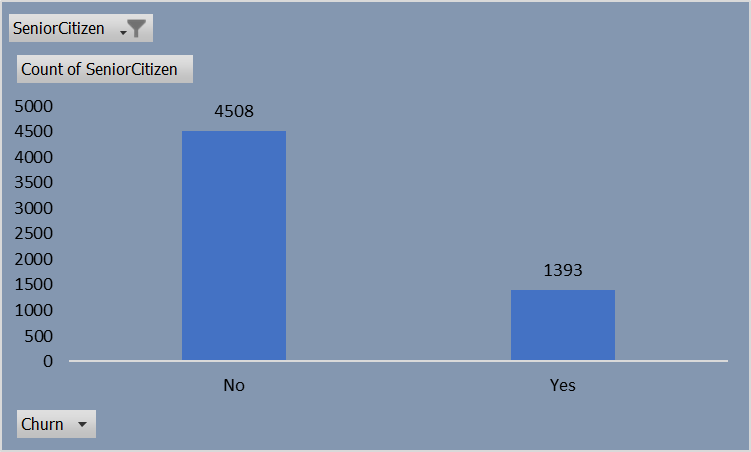

- Churn vs SeniorCitizen[1]

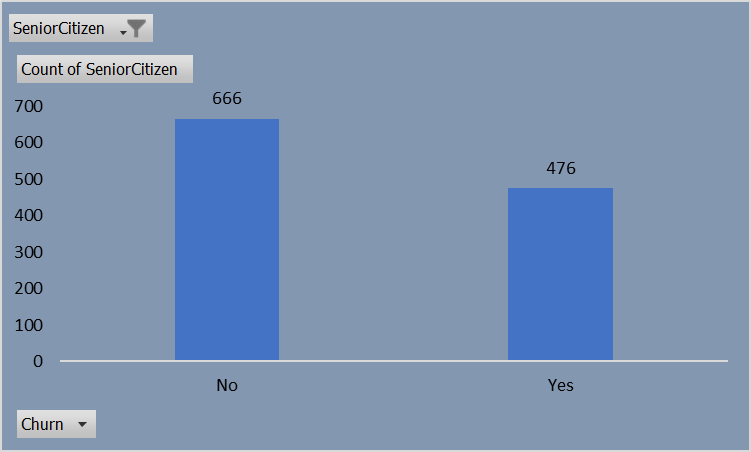

- Contact vs Count of Churn[No]

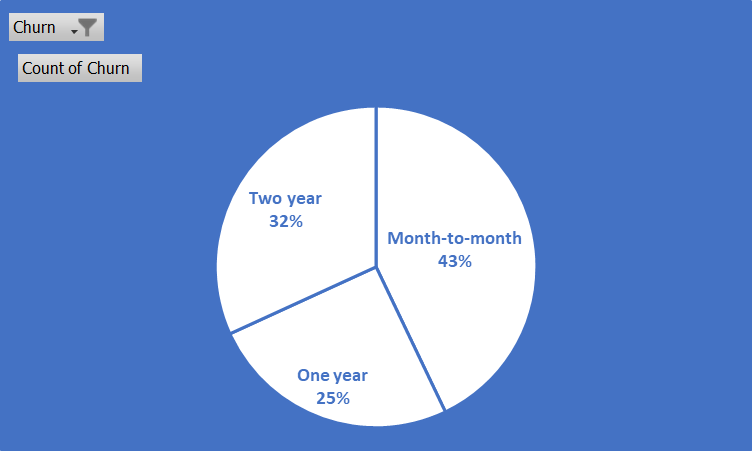

- Contact vs Count of Churn[Yes]

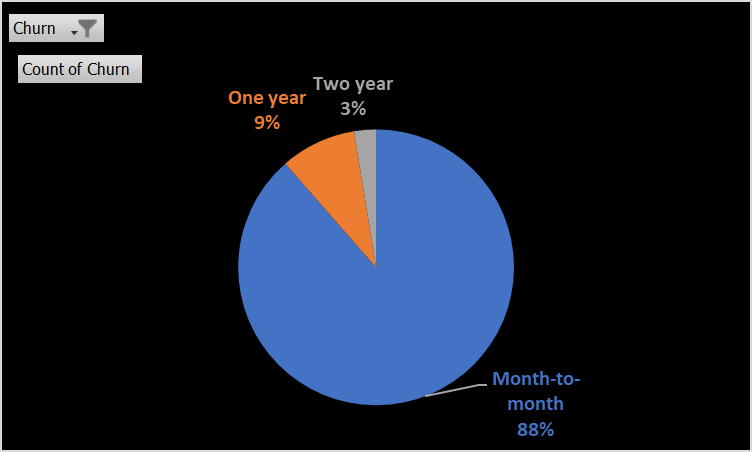

- TechSupport vs Churn[Yes]

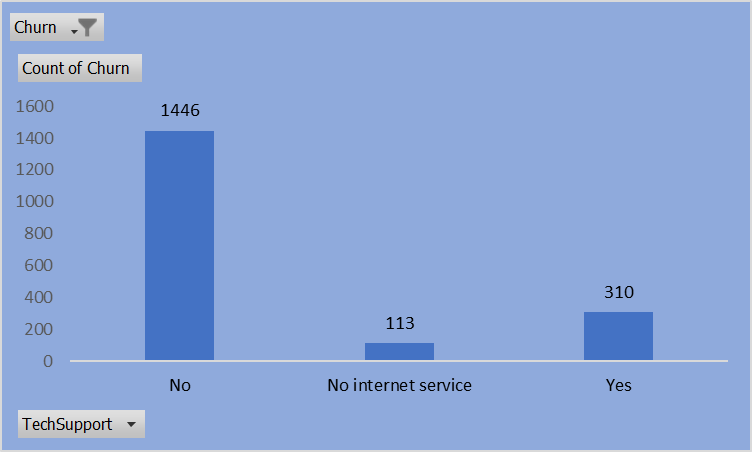

- TechSupport vs Churn[No]

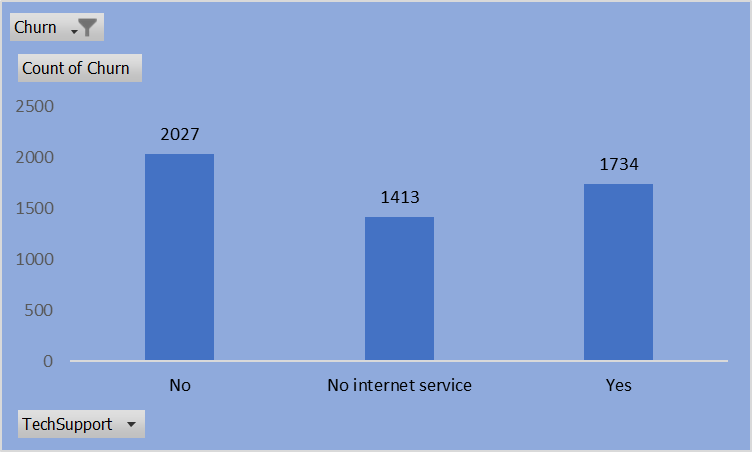

- Gender vs count of PhoneService[Yes]

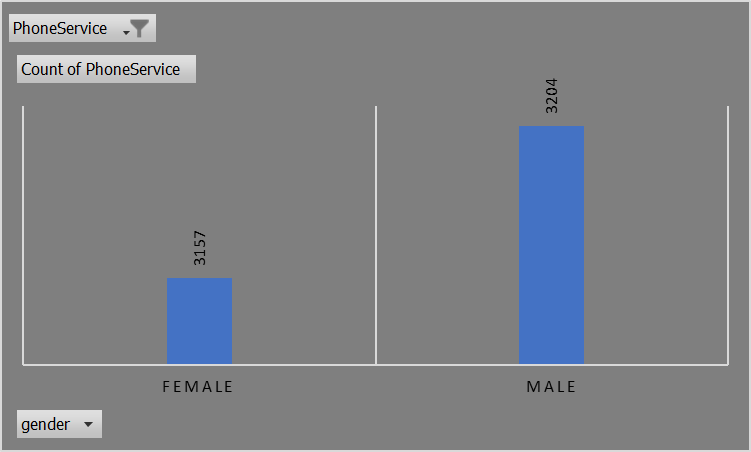

- Gender vs count of PhoneService[No]

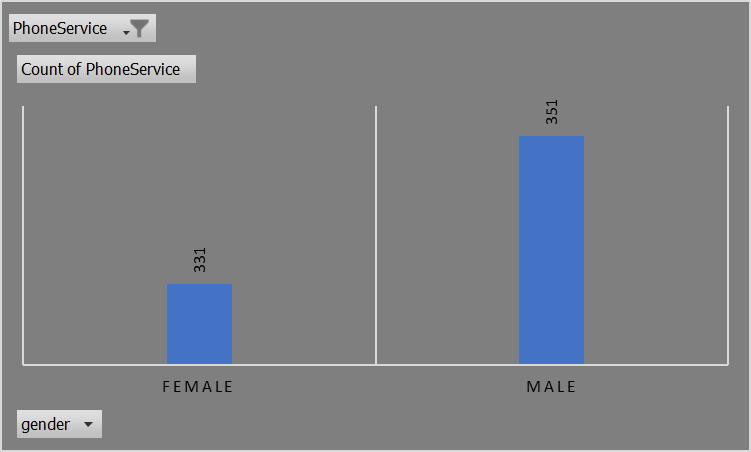

     Gender
    
      vs

- PhoneService     = Yes
- DeviceProtection = Yes
- MultipleLines    = Yes
- OnlineSecurity   = Yes
- OnlineBackup     = Yes
- InternetService  = DSL

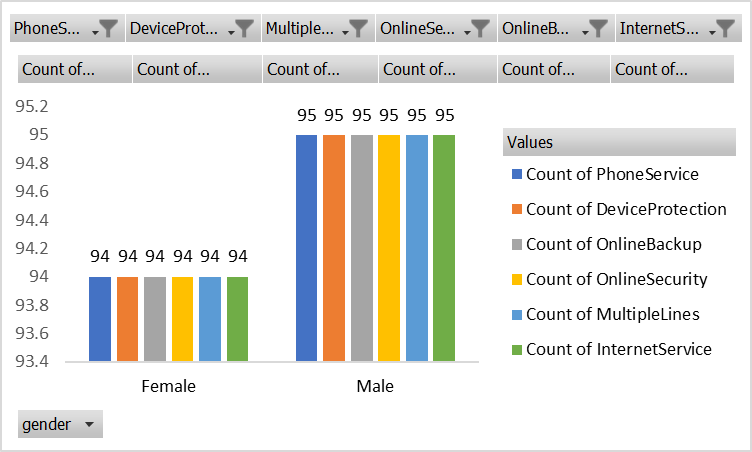

- Tenure vs Churn[Yes]

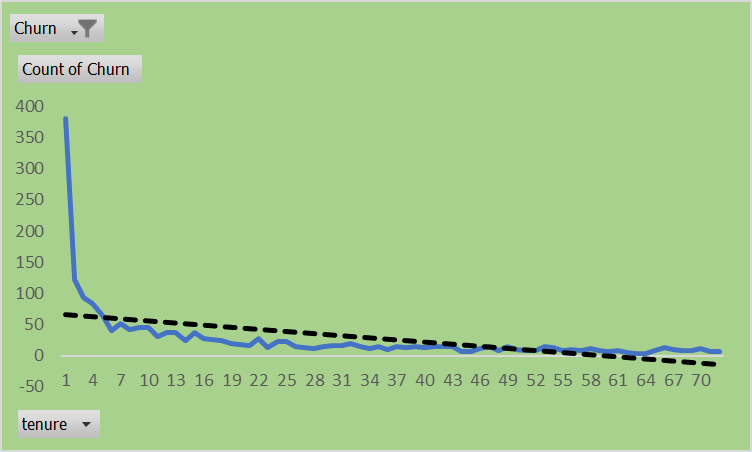

- Tenure vs Churn[No]

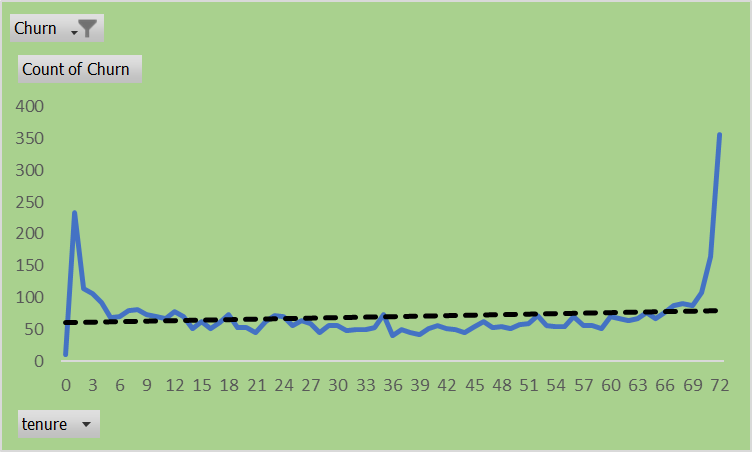

Payment method :-
    Most of the customer chose Electronic Check as a pement method

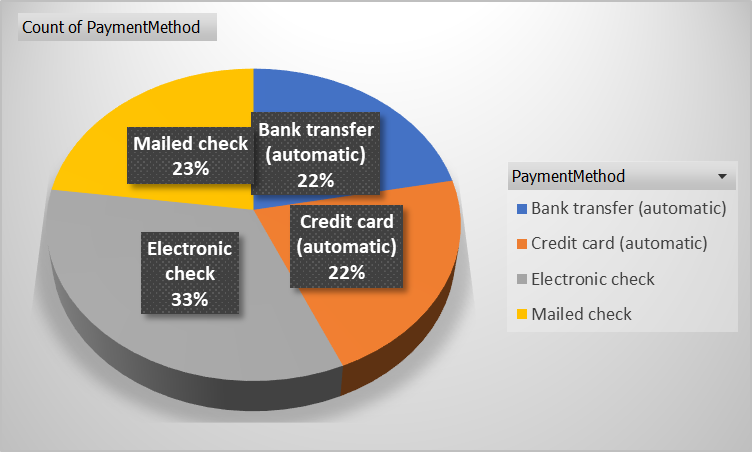

Contract :- Most of the customer chose Month-to-Month contract

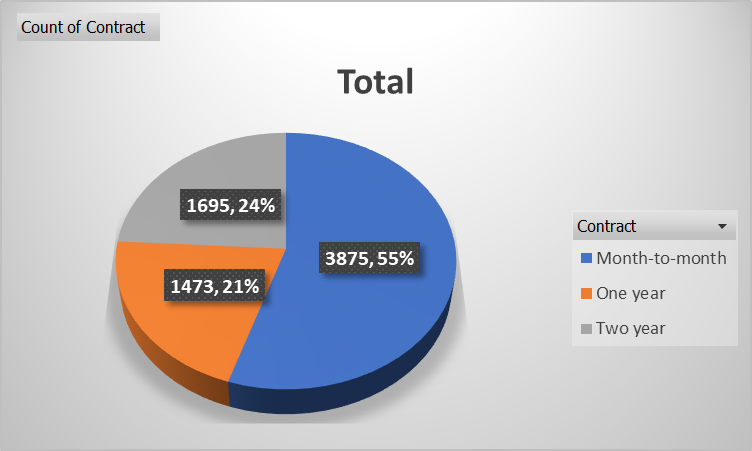

PaperlessBilling :- Most of the customer having paperless bill

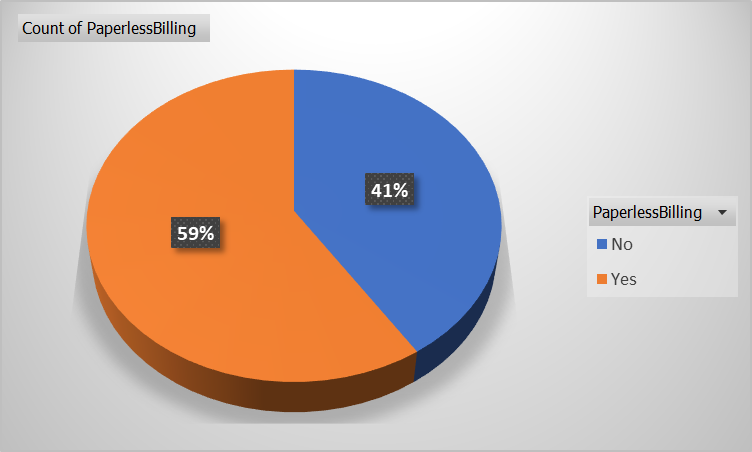

InternetService :- Most of the customer chose "Fiber Optic" as Internet Service

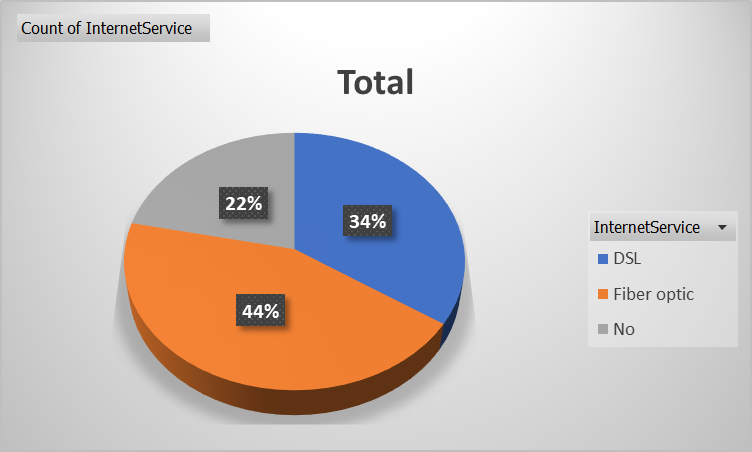

## 4) Feature Engineering

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### customerID

In [159]:
df.drop("customerID",axis=1,inplace=True)

#### gender

In [160]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [161]:
df["gender"] = df["gender"].replace({"Male":0,"Female":1})

In [162]:
df["gender"].value_counts()

gender
0    3555
1    3488
Name: count, dtype: int64

#### Partner

In [163]:
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [164]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [165]:
df["Partner"] = df["Partner"].replace({'Yes':1, 'No':0})

In [166]:
df["Partner"].value_counts()

Partner
0    3641
1    3402
Name: count, dtype: int64

#### Dependents

In [167]:
df["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [168]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [169]:
df["Dependents"] = df["Dependents"].replace({'No':0, 'Yes':1})

In [170]:
df["Dependents"].value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

#### PhoneService

In [171]:
df["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [172]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [173]:
df["PhoneService"] = df["PhoneService"].replace({'No':0, 'Yes':1})

In [174]:
df["PhoneService"].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

#### MultipleLines

In [175]:
df["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [176]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [177]:
df["MultipleLines"] = df["MultipleLines"].replace({'No phone service':0, 'No':1, 'Yes':2})

In [178]:
df["MultipleLines"].value_counts()

MultipleLines
1    3390
2    2971
0     682
Name: count, dtype: int64

#### InternetService

In [179]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [180]:
df["InternetService"] = df["InternetService"].replace({'DSL':2, 'Fiber optic':1, 'No':0})

In [181]:
df["InternetService"].unique()

array([2, 1, 0], dtype=int64)

#### OnlineSecurity

In [182]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [183]:
df["OnlineSecurity"] = df["OnlineSecurity"].replace({'No':1, 'Yes':2, 'No internet service':0})

In [184]:
df["OnlineSecurity"].unique()

array([1, 2, 0], dtype=int64)

#### OnlineBackup

In [185]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [186]:
df["OnlineBackup"] = df["OnlineBackup"].replace({'Yes':2, 'No':1, 'No internet service':0})

In [187]:
df["OnlineBackup"].unique()

array([2, 1, 0], dtype=int64)

#### DeviceProtection

In [188]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [189]:
df["DeviceProtection"].replace({'No':1, 'Yes':2, 'No internet service':0},inplace=True)

In [190]:
df["DeviceProtection"].unique()

array([1, 2, 0], dtype=int64)

#### TechSupport

In [191]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [192]:
df["TechSupport"].replace({'No':1, 'Yes':2, 'No internet service':0},inplace = True)

In [193]:
df["TechSupport"].unique()

array([1, 2, 0], dtype=int64)

#### StreamingTV

In [194]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [195]:
df["StreamingTV"].replace({'No':1, 'Yes':2, 'No internet service':0},inplace = True)

In [196]:
df["StreamingTV"].unique()

array([1, 2, 0], dtype=int64)

#### StreamingMovies

In [197]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [198]:
df["StreamingMovies"] = df["StreamingMovies"].replace({'No':1, 'Yes':2, 'No internet service':0})

In [199]:
df["StreamingMovies"].unique()

array([1, 2, 0], dtype=int64)

#### Contract

In [200]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [201]:
df = pd.get_dummies(data=df,columns=["Contract"],dtype=int)

In [202]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,0,2,1,2,1,1,1,1,Yes,Electronic check,29.85,29.85,No,1,0,0
1,0,0,0,0,34,1,1,2,2,1,2,1,1,1,No,Mailed check,56.95,1889.5,No,0,1,0
2,0,0,0,0,2,1,1,2,2,2,1,1,1,1,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,0,0,0,0,45,0,0,2,2,1,2,2,1,1,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0
4,1,0,0,0,2,1,1,1,1,1,1,1,1,1,Yes,Electronic check,70.70,151.65,Yes,1,0,0


#### PaperlessBilling

In [203]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [204]:
df["PaperlessBilling"].replace({'Yes':1, 'No':0},inplace = True)

In [205]:
df["PaperlessBilling"].unique()

array([1, 0], dtype=int64)

#### PaymentMethod

In [206]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [207]:
df = pd.get_dummies(data=df,columns=["PaymentMethod"],dtype=int)

In [208]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,2,1,2,1,1,1,1,1,29.85,29.85,No,1,0,0,0,0,1,0
1,0,0,0,0,34,1,1,2,2,1,2,1,1,1,0,56.95,1889.5,No,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,2,2,2,1,1,1,1,1,53.85,108.15,Yes,1,0,0,0,0,0,1


#### TotalCharges

In [209]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [210]:
df["TotalCharges"].isna().sum()

11

In [211]:
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [212]:
df[df["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,1,0,1,1,0,0,0,2,2,1,2,2,2,1,1,52.55,NaN,No,0,0,1,1,0,0,0
753,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,20.25,NaN,No,0,0,1,0,0,0,1
936,1,0,1,1,0,1,1,2,2,2,2,1,2,2,0,80.85,NaN,No,0,0,1,0,0,0,1
1082,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,25.75,NaN,No,0,0,1,0,0,0,1
1340,1,0,1,1,0,0,0,2,2,2,2,2,2,1,0,56.05,NaN,No,0,0,1,0,1,0,0
3331,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,19.85,NaN,No,0,0,1,0,0,0,1
3826,0,0,1,1,0,1,2,0,0,0,0,0,0,0,0,25.35,NaN,No,0,0,1,0,0,0,1
4380,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,20.00,NaN,No,0,0,1,0,0,0,1
5218,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,19.70,NaN,No,0,1,0,0,0,0,1
6670,1,0,1,1,0,1,2,2,1,2,2,2,2,1,0,73.35,NaN,No,0,0,1,0,0,0,1


In [213]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [214]:
df["TotalCharges"].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [215]:
df["TotalCharges"].isna().sum()

0

#### Churn

In [216]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [217]:
df["Churn"].replace({'No':0, 'Yes':1},inplace=True)

In [218]:
df["Churn"].unique()

array([0, 1], dtype=int64)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [220]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,2,1,2,1,1,1,1,1,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,1,2,2,1,2,1,1,1,0,56.95,1889.50,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,2,2,2,1,1,1,1,1,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,2,2,1,2,2,1,1,0,42.30,1840.75,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,1,1,1,1,1,1,1,1,70.70,151.65,1,1,0,0,0,0,1,0


### Feature Creation

#### MonthlyCharges

In [227]:
buckets = [18,40,60,80,100,np.inf]
labels  = [0,1,2,3,4]
df["MonthlyCharges_bucket"] = pd.cut(df["MonthlyCharges"],bins=buckets,labels=labels,include_lowest=True,right = False)
df[["MonthlyCharges_bucket","MonthlyCharges"]].head()

,MonthlyCharges_bucket,MonthlyCharges
0,0,29.85
1,1,56.95
2,1,53.85
3,1,42.30
4,2,70.70


In [226]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_bucket
0,1,0,1,0,1,0,0,2,1,2,1,1,1,1,1,29.85,29.85,0,1,0,0,0,0,1,0,0
1,0,0,0,0,34,1,1,2,2,1,2,1,1,1,0,56.95,1889.50,0,0,1,0,0,0,0,1,1
2,0,0,0,0,2,1,1,2,2,2,1,1,1,1,1,53.85,108.15,1,1,0,0,0,0,0,1,1
3,0,0,0,0,45,0,0,2,2,1,2,2,1,1,0,42.30,1840.75,0,0,1,0,1,0,0,0,1
4,1,0,0,0,2,1,1,1,1,1,1,1,1,1,1,70.70,151.65,1,1,0,0,0,0,1,0,2


#### TotalCharges

In [229]:
buckets = [18,1500,3000,4500,6000,np.inf]
labels  = [0,1,2,3,4]
df["TotalCharges_bucket"] = pd.cut(df["TotalCharges"],bins=buckets,labels=labels,include_lowest=True,right = False)
df[["TotalCharges_bucket","TotalCharges"]].head()

,TotalCharges_bucket,TotalCharges
0,0,29.85
1,1,1889.50
2,0,108.15
3,1,1840.75
4,0,151.65


In [230]:
df["TotalCharges_bucket"].value_counts()

TotalCharges_bucket
0    3661
1    1178
2     808
3     704
4     692
Name: count, dtype: int64

In [231]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_bucket,TotalCharges_bucket
0,1,0,1,0,1,0,0,2,1,2,1,1,1,1,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,34,1,1,2,2,1,2,1,1,1,0,56.95,1889.50,0,0,1,0,0,0,0,1,1,1
2,0,0,0,0,2,1,1,2,2,2,1,1,1,1,1,53.85,108.15,1,1,0,0,0,0,0,1,1,0
3,0,0,0,0,45,0,0,2,2,1,2,2,1,1,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,1
4,1,0,0,0,2,1,1,1,1,1,1,1,1,1,1,70.70,151.65,1,1,0,0,0,0,1,0,2,0


## 5) Feature Selection

In [237]:
len(df.columns)

27

In [241]:
vif_list = []
for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.values,i)
    vif_list.append(vif)
vif1 = pd.DataFrame()
vif1["VIF"] = vif_list
vif1["Columns"] = df.columns
vif1

,VIF,Columns
0,1.002305,gender
1,1.155157,SeniorCitizen
2,1.462482,Partner
3,1.385417,Dependents
4,7.694100,tenure
5,3.779544,PhoneService
6,3.376514,MultipleLines
7,19.167219,InternetService
8,5.440385,OnlineSecurity
9,5.500678,OnlineBackup


In [248]:
vif_list = []
df1 = df.drop(["TotalCharges","MonthlyCharges","InternetService"],axis=1)
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.values,i)
    vif_list.append(vif)
vif1 = pd.DataFrame()
vif1["VIF"] = vif_list
vif1["Columns"] = df1.columns
vif1

,VIF,Columns
0,1.001317,gender
1,1.147687,SeniorCitizen
2,1.462220,Partner
3,1.383217,Dependents
4,5.187747,tenure
5,2.739555,PhoneService
6,2.562195,MultipleLines
7,2.790335,OnlineSecurity
8,2.990798,OnlineBackup
9,3.405263,DeviceProtection


## 6) Model Training

### Spliting

In [249]:
x = df1.drop("Churn",axis=1)
y = df1["Churn"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [250]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

### 7) Evaluation

- Evaluation of testing data

In [251]:
y_pred = lg_model.predict(x_test)

cnf_mtx = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_mtx)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy\n",accuracy)
clf_report = classification_report(y_test,y_pred)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[1158  136]
 [ 235  232]]
Accuracy
 0.7893242475865985
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.63      0.50      0.56       467

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



- Evaluation of Traing Data

In [252]:
y_pred = lg_model.predict(x_train)

cnf_mtx = confusion_matrix(y_train,y_pred)
print("Confusion Matrix\n",cnf_mtx)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy\n",accuracy)
clf_report = classification_report(y_train,y_pred)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[3504  376]
 [ 679  723]]
Accuracy
 0.8002650511170011
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3880
           1       0.66      0.52      0.58      1402

    accuracy                           0.80      5282
   macro avg       0.75      0.71      0.72      5282
weighted avg       0.79      0.80      0.79      5282

